In [100]:
# Temel kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd

# Görselleştirme
import seaborn as sns #for plotting
import matplotlib.pyplot as plt

# Model Kurma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split

from sklearn import preprocessing



In [101]:
df = pd.read_csv("/content/drive/MyDrive/AIDS/AIDS_Classification_15000.csv")

df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1162,3,36,59.63057,0,1,0,100,0,0,...,0,1,0,1,1,263,358,2091,608,0
14996,1158,0,27,102.69575,0,0,0,90,0,0,...,0,1,0,1,0,327,582,839,392,0
14997,468,3,40,79.07121,0,1,1,90,0,1,...,1,3,0,1,0,283,211,2325,1000,1
14998,1194,2,40,80.51779,0,0,0,90,0,0,...,1,3,1,1,0,237,406,560,860,0


In [102]:
# Verimize bakalım.
df.head(10)


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0
5,1071,2,20,62.11097,0,0,0,82,0,1,...,1,1,0,0,0,257,218,1249,1546,0
6,587,2,25,63.88170,1,1,0,100,0,1,...,1,2,0,1,1,199,555,1065,1219,1
7,1145,2,30,75.75620,0,1,0,90,0,1,...,1,2,0,1,1,480,330,830,921,0
8,1047,3,30,89.61961,0,1,0,100,0,0,...,0,1,0,1,0,223,627,663,630,0
9,481,3,40,79.16276,0,1,0,100,0,0,...,1,3,1,0,0,202,177,563,1301,0


In [103]:
pd.DataFrame(df.isna().sum()).T.style.background_gradient(cmap='rainbow')


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      15000 non-null  int64  
 1   trt       15000 non-null  int64  
 2   age       15000 non-null  int64  
 3   wtkg      15000 non-null  float64
 4   hemo      15000 non-null  int64  
 5   homo      15000 non-null  int64  
 6   drugs     15000 non-null  int64  
 7   karnof    15000 non-null  int64  
 8   oprior    15000 non-null  int64  
 9   z30       15000 non-null  int64  
 10  preanti   15000 non-null  int64  
 11  race      15000 non-null  int64  
 12  gender    15000 non-null  int64  
 13  str2      15000 non-null  int64  
 14  strat     15000 non-null  int64  
 15  symptom   15000 non-null  int64  
 16  treat     15000 non-null  int64  
 17  offtrt    15000 non-null  int64  
 18  cd40      15000 non-null  int64  
 19  cd420     15000 non-null  int64  
 20  cd80      15000 non-null  in

In [105]:
df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
time,15000.000000,876.719667,308.105122,68.000000,68.000000,539.000000,594.000000,1045.000000,1137.000000,1148.000000,1231.000000,1231.000000
trt,15000.000000,1.395333,1.237880,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.000000
age,15000.000000,34.273800,7.074134,12.000000,12.000000,29.000000,30.000000,34.000000,39.000000,40.000000,68.000000,68.000000
wtkg,15000.000000,76.019604,12.170759,42.256390,42.256390,68.323125,69.611356,74.114225,81.309035,83.612396,141.612390,141.612390
hemo,15000.000000,0.032000,0.176006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
homo,15000.000000,0.652733,0.476117,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
drugs,15000.000000,0.127867,0.333952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
karnof,15000.000000,96.777533,5.135257,77.000000,77.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
oprior,15000.000000,0.041067,0.198451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
z30,15000.000000,0.645867,0.478266,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


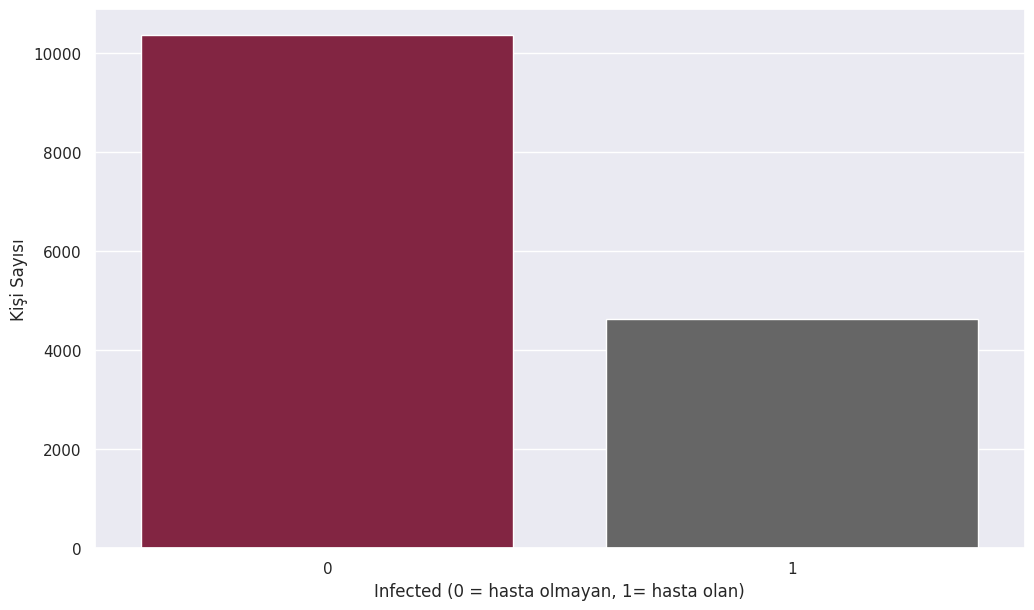

In [106]:
  # seaborn
color = ["#91153C","#666666"]
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x="infected",
              data=df,
              hue="infected",
              palette=color,
              legend=False)
plt.ylabel("Kişi Sayısı")
plt.xlabel("Infected (0 = hasta olmayan, 1= hasta olan)")



plt.savefig('AIDS1.png',transparent=True)
plt.show()

AIDS olanlar ile olmayanların yüzdesini istedik.

In [107]:
countNoDisease = len(df[df.infected == 0]) # hastalığı olmayanların sayısı
countHaveDisease = len(df[df.infected == 1]) # hastalığı olanların sayısı

print("AIDS hastalığına sahip olmayanların yüzdesi: {:.2f}%".format((countNoDisease / (len(df.infected))*100)))
print("AIDS hastalığına sahip olanların yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.infected))*100)))


AIDS hastalığına sahip olmayanların yüzdesi: 69.13%
AIDS hastalığına sahip olanların yüzdesi: 30.87%


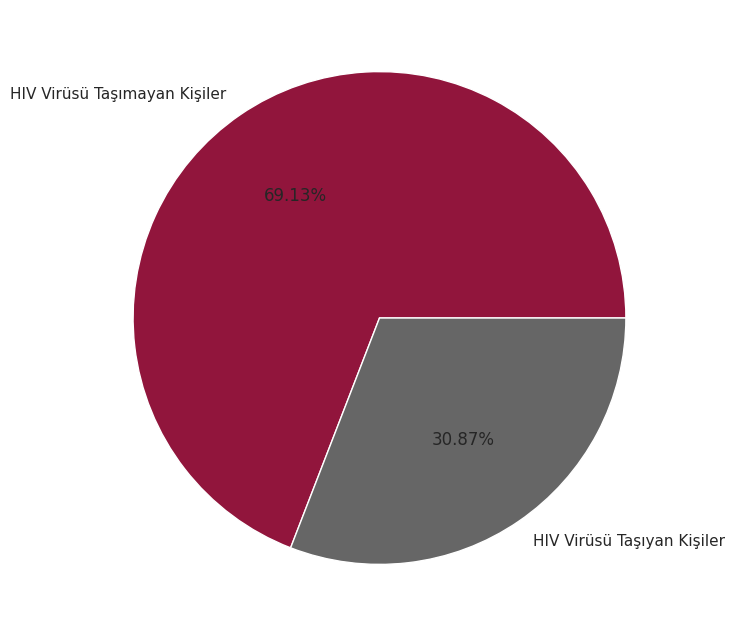

In [108]:
plt.figure(figsize=(8,8))
color = ["#91153C","#666666"]
plt.pie([countNoDisease,countHaveDisease],
        labels=["HIV Virüsü Taşımayan Kişiler","HIV Virüsü Taşıyan Kişiler"],
        colors=color,
        autopct='%1.2f%%');


plt.savefig('AIDS2.png',transparent=True)


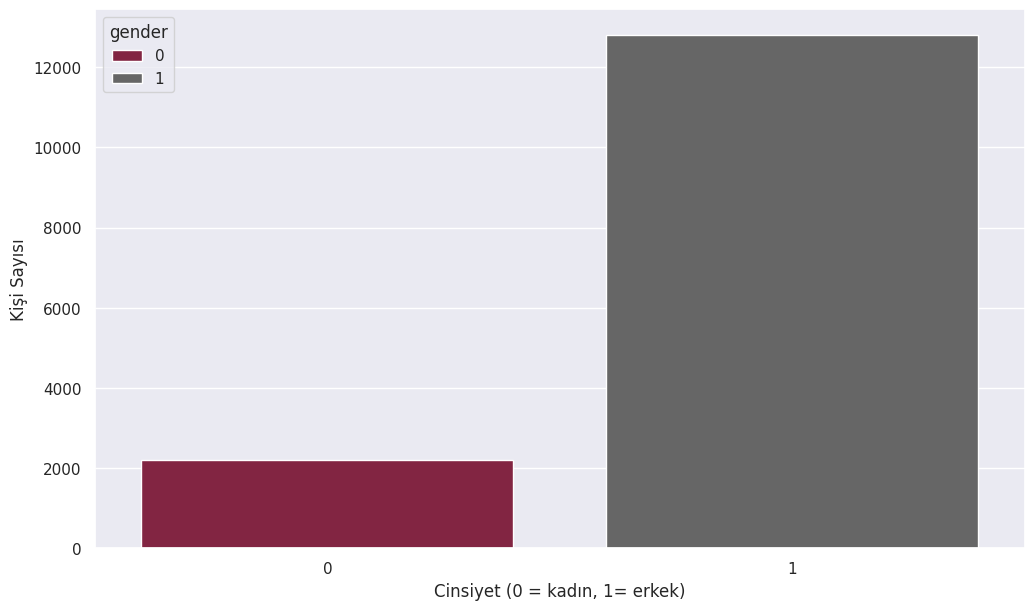

In [109]:
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x='gender',
              data=df,
              hue= 'gender',
              palette=color)
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel("Kişi Sayısı")
plt.savefig('cinsiyet.png',transparent=True)

plt.show()


In [110]:
countFemale = len(df[df.gender == 0]) # kadınların sayısı
countMale = len(df[df.gender == 1]) # erkeklerin sayısı
print("Kadın hastaların yüzdesi: {:.2f}%".format((countFemale / (len(df.gender))*100)))
print("Erkek hastaların yüzdesi: {:.2f}%".format((countMale / (len(df.gender))*100)))

Kadın hastaların yüzdesi: 14.62%
Erkek hastaların yüzdesi: 85.38%


In [111]:
df.groupby('infected').mean()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
infected,,,,,,,,,,,,,,,,,,,,,
0,898.895554,1.427814,34.092969,76.337970,0.028257,0.651558,0.133764,96.876169,0.036358,0.570065,...,0.858810,0.499952,1.791012,0.081686,0.747131,0.357508,328.219018,453.834121,1053.469862,913.524062
1,827.066940,1.322609,34.678687,75.306768,0.040380,0.655366,0.114662,96.556683,0.051609,0.815591,...,0.842583,0.749514,2.264738,0.101922,0.712373,0.329303,297.564025,396.647160,1041.079033,896.625351


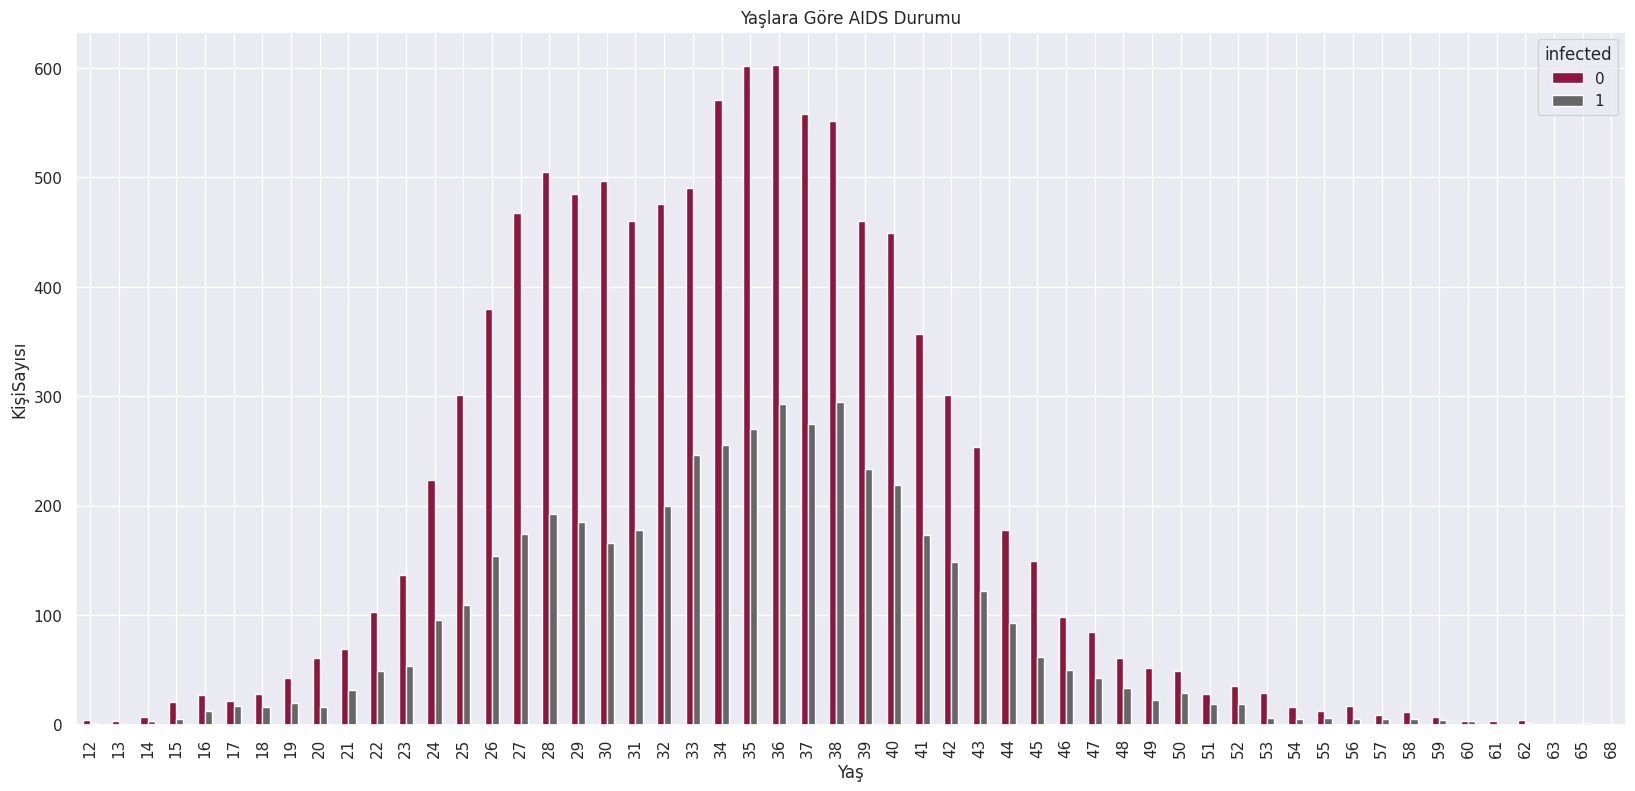

In [112]:


pd.crosstab(df.age,df.infected).plot(kind="bar",figsize=(20,9),color=color)
plt.title('Yaşlara Göre AIDS Durumu')
plt.xlabel('Yaş')
plt.ylabel('KişiSayısı')


plt.savefig('HIVandAges.png',transparent=True)
plt.show()



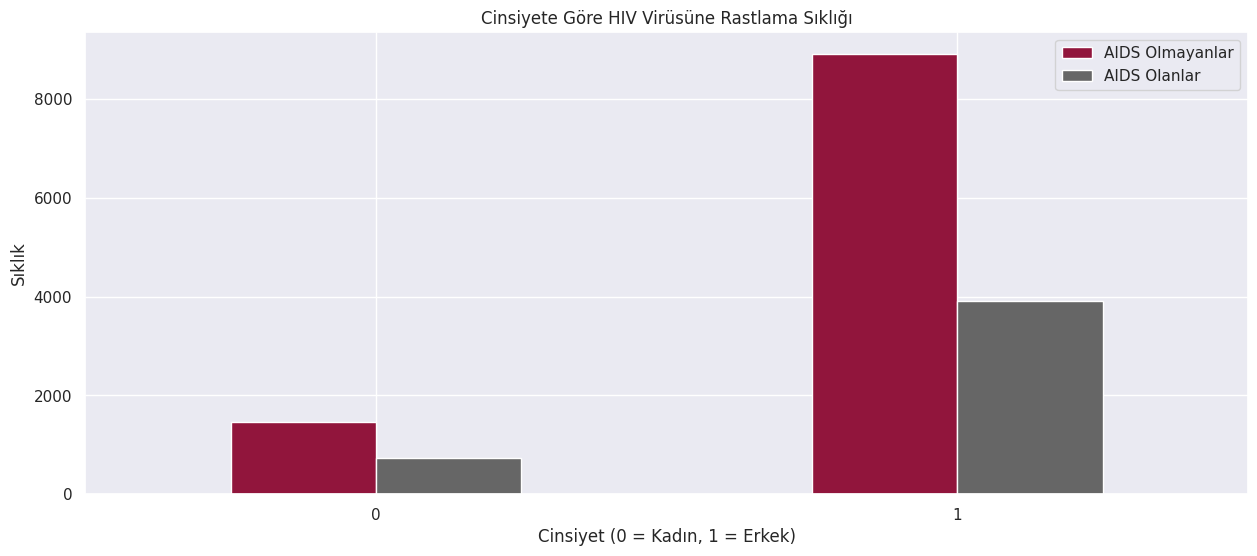

In [113]:
pd.crosstab(df.gender,df.infected).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Cinsiyete Göre HIV Virüsüne Rastlama Sıklığı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.xticks(rotation=0)
plt.legend(["AIDS Olmayanlar", "AIDS Olanlar"])
plt.ylabel('Sıklık')
plt.savefig('cinsiyetegörehastalık.png',transparent=True)


plt.show()

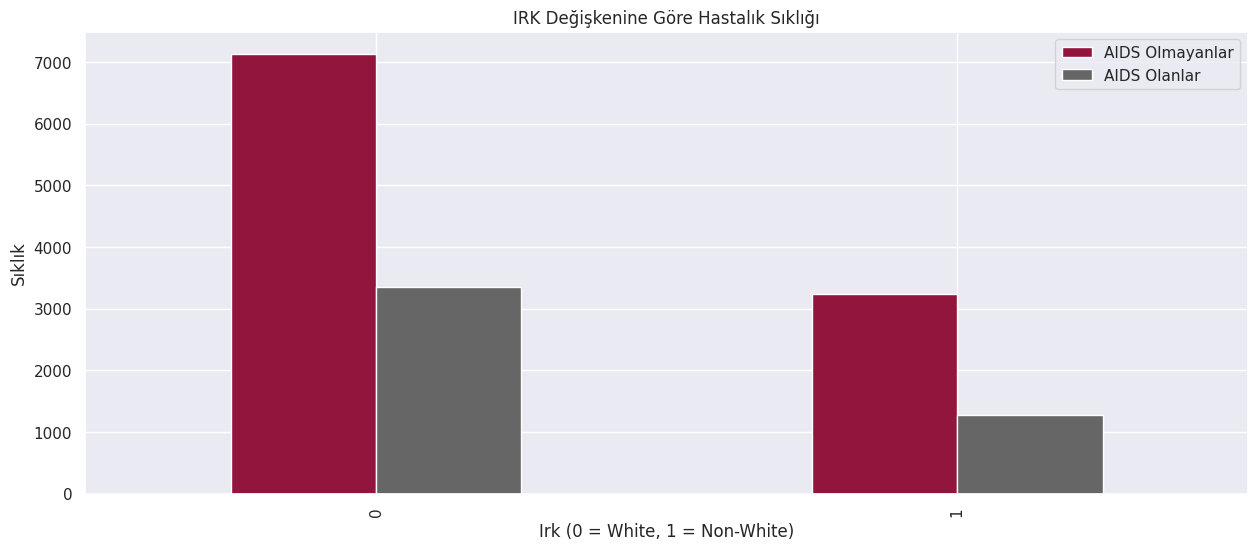

In [114]:
color = ["#91153C","#666666"]
pd.crosstab(df.race,df.infected).plot(kind="bar",figsize=(15,6),color=color)
plt.title('IRK Değişkenine Göre Hastalık Sıklığı')
plt.xlabel('Irka göre HIV Virüsü Rastlanma Sıklığı ')
plt.xlabel('Irk (0 = White, 1 = Non-White)')

plt.legend(["AIDS Olmayanlar", "AIDS Olanlar"])
plt.ylabel('Sıklık')
plt.savefig('irk.png',transparent=True)


plt.show()

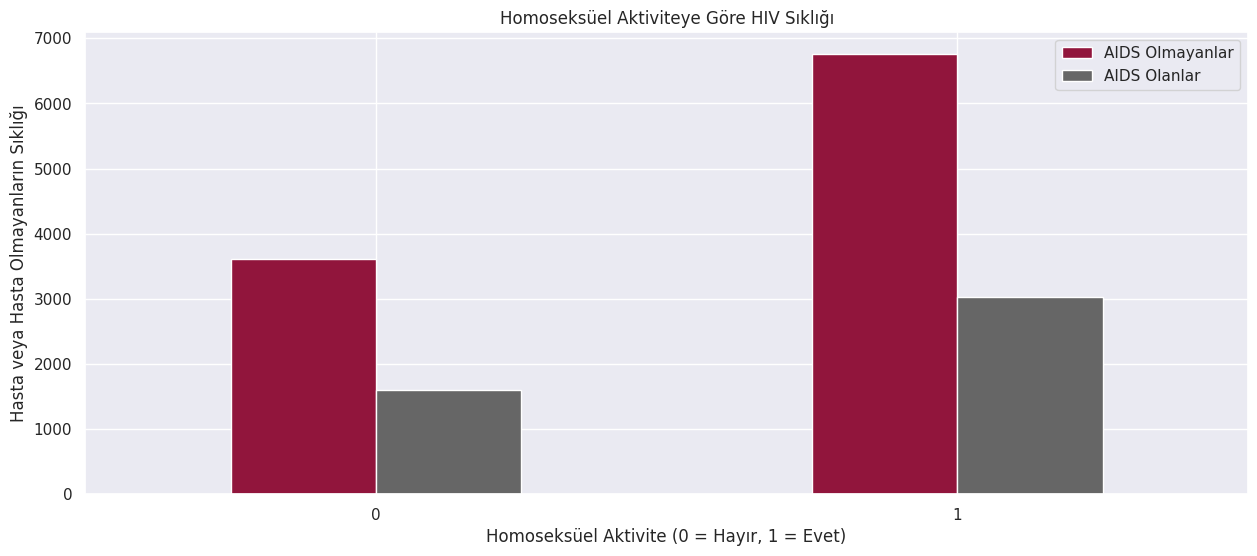

In [115]:
pd.crosstab(df.homo, df.infected).plot(kind="bar", figsize=(15, 6), color=color)
plt.title('Homoseksüel Aktiviteye Göre HIV Sıklığı')
plt.xticks(rotation = 0)
plt.legend(["AIDS Olmayanlar", "AIDS Olanlar"])
plt.xlabel('Homoseksüel Aktivite (0 = Hayır, 1 = Evet)')

plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('homo.png',transparent=True)


plt.show()

In [116]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0


In [117]:
print("""
Age değişkeni eşsiz değerleri: {}
Hemo değişkeni eşsiz değerleri: {}
Homo değişkeni eşsiz değerleri: {}
Drugs değişkeni eşsiz değerleri: {}
Karnof değişkeni eşsiz değerleri: {}
Oprior değişkeni eşsiz değerleri: {}
z30 değişkeni eşsiz değerleri: {}
preanti değişkeni eşsiz değerleri: {}
race değişkeni eşsiz değerleri: {}
gender değişkeni eşsiz değerleri: {}
str2 değişkeni eşsiz değerleri: {}
strat değişkeni eşsiz değerleri: {}
symptom değişkeni eşsiz değerleri: {}
treat değişkeni eşsiz değerleri: {}
offtrt değişkeni eşsiz değerleri: {}
cd40 değişkeni eşsiz değerleri: {}
cd420 değişkeni eşsiz değerleri: {}
cd80 değişkeni eşsiz değerleri: {}
cd820 değişkeni eşsiz değerleri: {}
""".format(df.age.unique(),
           df.hemo.unique(),
           df.homo.unique(),
           df.drugs.unique(),
           df.karnof.unique(),
           df.oprior.unique(),
           df.z30.unique(),
           df.preanti.unique(),
           df.race.unique(),
           df.gender.unique(),
           df.str2.unique(),
           df.strat.unique(),
           df.symptom.unique(),
           df.treat.unique(),
           df.offtrt.unique(),
           df.cd40.unique(),
           df.cd420.unique(),
           df.cd80.unique(),
           df.cd820.unique(),
           ))


Age değişkeni eşsiz değerleri: [37 43 34 41 47 20 25 30 40 26 36 29 27 33 42 46 35 45 23 31 39 38 21 51
 32 28 44 24 15 22 62 19 16 50 48 18 53 52 17 57 54 60 49 59 58 55 56 12
 13 61 14 68 63 65]
Hemo değişkeni eşsiz değerleri: [0 1]
Homo değişkeni eşsiz değerleri: [1 0]
Drugs değişkeni eşsiz değerleri: [1 0]
Karnof değişkeni eşsiz değerleri: [100  90  81  82  80  79  78  83  91  77]
Oprior değişkeni eşsiz değerleri: [0 1]
z30 değişkeni eşsiz değerleri: [1 0]
preanti değişkeni eşsiz değerleri: [ 169  654  710 ... 1635  664  608]
race değişkeni eşsiz değerleri: [1 0]
gender değişkeni eşsiz değerleri: [0 1]
str2 değişkeni eşsiz değerleri: [1 0]
strat değişkeni eşsiz değerleri: [1 2 3]
symptom değişkeni eşsiz değerleri: [0 1]
treat değişkeni eşsiz değerleri: [0 1]
offtrt değişkeni eşsiz değerleri: [0 1]
cd40 değişkeni eşsiz değerleri: [389 318 326 280 257 199 480 223 202 432 243 428 454 477 171 209 312 253
 191 349 234 374 153 308 282 173 193 249 352 481 453 328 183 268 186 251
 205 240

In [118]:
df.dtypes


time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

In [119]:
df.hemo = pd.Categorical(df.hemo)
df.homo = pd.Categorical(df.homo)
df.drugs = pd.Categorical(df.drugs)
df.oprior = pd.Categorical(df.oprior)
df.z30 = pd.Categorical(df.z30)
df.race = pd.Categorical(df.race)
df.gender = pd.Categorical(df.gender)
df.str2 = pd.Categorical(df.str2)
df.symptom = pd.Categorical(df.symptom)
df.treat = pd.Categorical(df.treat)
df.offtrt = pd.Categorical(df.offtrt)


In [120]:
df = pd.get_dummies(df, drop_first=True)


In [121]:
df.head()

,time,trt,age,wtkg,karnof,preanti,strat,cd40,cd420,cd80,...,homo_1,drugs_1,oprior_1,z30_1,race_1,gender_1,str2_1,symptom_1,treat_1,offtrt_1
0,1108,1,37,88.11364,100,169,1,389,320,734,...,True,True,False,True,True,False,True,False,False,False
1,1079,0,43,66.77075,100,654,2,318,432,912,...,False,False,False,True,False,True,False,False,True,True
2,492,1,34,82.91725,90,710,2,326,524,660,...,False,False,False,True,False,True,True,False,True,True
3,1191,1,41,98.91817,81,992,3,318,232,1131,...,False,False,False,True,False,True,True,False,True,False
4,1141,3,47,53.61717,100,0,1,280,337,515,...,True,False,False,False,False,True,False,False,True,False


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Karmaşıklık matrisini görselleştirmek için bir fonksiyon tanımlama
def plot_confusion_matrix(conf_matrix, classes, model_name):
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Tahmin Edilen Etiketler')
    plt.ylabel('Gerçek Etiketler')
    plt.title('Confusion Matrix - {}'.format(model_name))
    plt.show()

Logistic Regression Results:
Accuracy: 70.70%
Recall: 0.23
Specificity: 0.92
Precision: 0.57
F1 Score: 0.33
Matthews Correlation Coefficient: 0.21
ROC AUC: 0.70



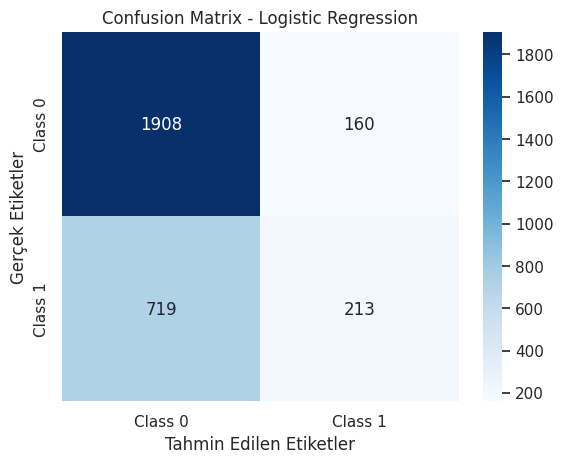

In [99]:
# Veriyi özellikler ve hedef değişken olarak ayırma
X = df.drop('infected', axis=1)
y = df['infected']
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Veriyi normalize etme
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine böleme
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1905)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Accuracy hesaplama
lr_accuracy = (lr_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, lr_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
lr_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
lr_specificity = tn / (tn + fp)

# Precision hesaplama
lr_precision = tp / (tp + fp)

# F1 score hesaplama
lr_f1_score = 2 * (lr_precision * lr_recall) / (lr_precision + lr_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama (Lojistik regresyon çıktıları olasılık olmalı)
lr_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
lr_roc_auc = metrics.auc(fpr, tpr)

print("Logistic Regression Results:")
print("Accuracy: {:.2f}%".format(lr_accuracy * 100))
print("Recall: {:.2f}".format(lr_recall))
print("Specificity: {:.2f}".format(lr_specificity))
print("Precision: {:.2f}".format(lr_precision))
print("F1 Score: {:.2f}".format(lr_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(lr_roc_auc))
print()


# Logistic Regression için karmaşıklık matrisini hesaplamak ve görselleştirmek
lr_y_pred = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
plot_confusion_matrix(lr_conf_matrix, classes=['Class 0', 'Class 1'], model_name='Logistic Regression')


K-Nearest Neighbors Results:
Accuracy: 66.93%
Recall: 0.15
Specificity: 0.90
Precision: 0.41
F1 Score: 0.22
Matthews Correlation Coefficient: 0.08
ROC AUC: 0.57



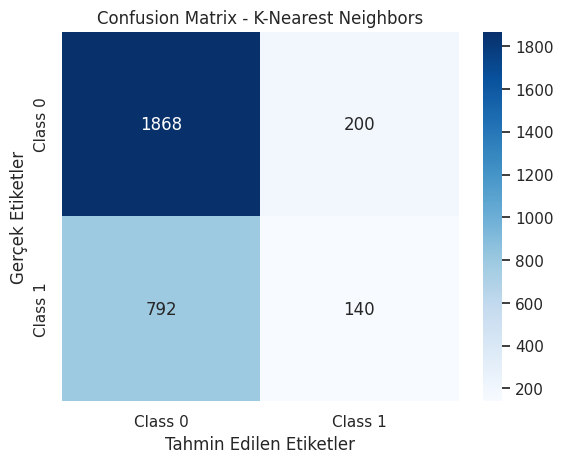

In [123]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Accuracy hesaplama
knn_accuracy = (knn_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, knn_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
knn_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
knn_specificity = tn / (tn + fp)

# Precision hesaplama
knn_precision = tp / (tp + fp)

# F1 score hesaplama
knn_f1_score = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
knn_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, knn_probs)
knn_roc_auc = metrics.auc(fpr, tpr)

print("K-Nearest Neighbors Results:")
print("Accuracy: {:.2f}%".format(knn_accuracy * 100))
print("Recall: {:.2f}".format(knn_recall))
print("Specificity: {:.2f}".format(knn_specificity))
print("Precision: {:.2f}".format(knn_precision))
print("F1 Score: {:.2f}".format(knn_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(knn_roc_auc))
print()

# K-Nearest Neighbors için karmaşıklık matrisini hesaplamak ve görselleştirmek
knn_y_pred = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
plot_confusion_matrix(knn_conf_matrix, classes=['Class 0', 'Class 1'], model_name='K-Nearest Neighbors')


Support Vector Machine (SVM) Results:
Accuracy: 69.33%
Recall: 0.08
Specificity: 0.97
Precision: 0.54
F1 Score: 0.15
Matthews Correlation Coefficient: 0.11
ROC AUC: 0.66



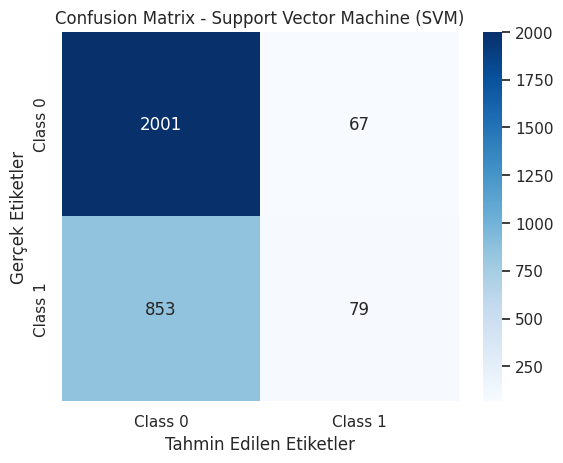

In [124]:
# Support Vector Machine (SVM)
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Accuracy hesaplama
svm_accuracy = (svm_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, svm_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
svm_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
svm_specificity = tn / (tn + fp)

# Precision hesaplama
svm_precision = tp / (tp + fp)

# F1 score hesaplama
svm_f1_score = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
svm_probs = svm.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, svm_probs)
svm_roc_auc = metrics.auc(fpr, tpr)

print("Support Vector Machine (SVM) Results:")
print("Accuracy: {:.2f}%".format(svm_accuracy * 100))
print("Recall: {:.2f}".format(svm_recall))
print("Specificity: {:.2f}".format(svm_specificity))
print("Precision: {:.2f}".format(svm_precision))
print("F1 Score: {:.2f}".format(svm_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(svm_roc_auc))
print()

# Support Vector Machine (SVM) için karmaşıklık matrisini hesaplamak ve görselleştirmek
svm_y_pred = svm.predict(X_test)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
plot_confusion_matrix(svm_conf_matrix, classes=['Class 0', 'Class 1'], model_name='Support Vector Machine (SVM)')


Naive Bayes Results:
Accuracy: 65.90%
Recall: 0.58
Specificity: 0.69
Precision: 0.46
F1 Score: 0.52
Matthews Correlation Coefficient: 0.26
ROC AUC: 0.68



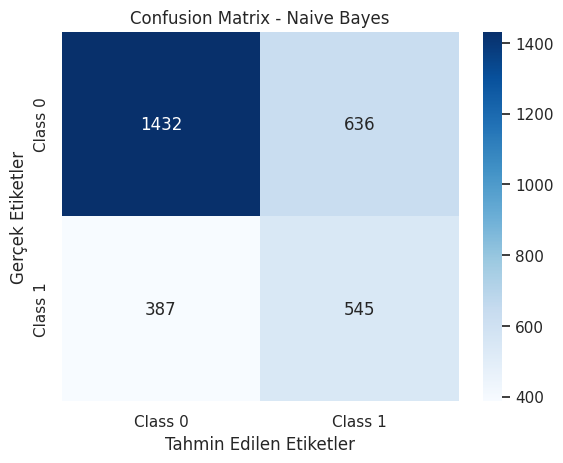

In [125]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Accuracy hesaplama
nb_accuracy = (nb_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, nb_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
nb_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
nb_specificity = tn / (tn + fp)

# Precision hesaplama
nb_precision = tp / (tp + fp)

# F1 score hesaplama
nb_f1_score = 2 * (nb_precision * nb_recall) / (nb_precision + nb_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
nb_probs = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, nb_probs)
nb_roc_auc = metrics.auc(fpr, tpr)

print("Naive Bayes Results:")
print("Accuracy: {:.2f}%".format(nb_accuracy * 100))
print("Recall: {:.2f}".format(nb_recall))
print("Specificity: {:.2f}".format(nb_specificity))
print("Precision: {:.2f}".format(nb_precision))
print("F1 Score: {:.2f}".format(nb_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(nb_roc_auc))
print()


# Naive Bayes için karmaşıklık matrisini hesaplamak ve görselleştirmek
nb_y_pred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
plot_confusion_matrix(nb_conf_matrix, classes=['Class 0', 'Class 1'], model_name='Naive Bayes')


Decision Tree Results:
Accuracy: 60.27%
Recall: 0.39
Specificity: 0.70
Precision: 0.37
F1 Score: 0.38
Matthews Correlation Coefficient: 0.09
ROC AUC: 0.54



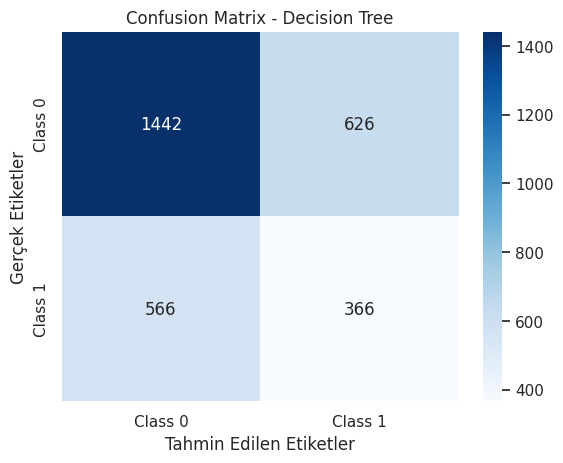

In [126]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

# Accuracy hesaplama
dtc_accuracy = (dtc_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, dtc_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
dtc_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
dtc_specificity = tn / (tn + fp)

# Precision hesaplama
dtc_precision = tp / (tp + fp)

# F1 score hesaplama
dtc_f1_score = 2 * (dtc_precision * dtc_recall) / (dtc_precision + dtc_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
dtc_probs = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dtc_probs)
dtc_roc_auc = metrics.auc(fpr, tpr)

print("Decision Tree Results:")
print("Accuracy: {:.2f}%".format(dtc_accuracy * 100))
print("Recall: {:.2f}".format(dtc_recall))
print("Specificity: {:.2f}".format(dtc_specificity))
print("Precision: {:.2f}".format(dtc_precision))
print("F1 Score: {:.2f}".format(dtc_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(dtc_roc_auc))
print()


# Decision Tree için karmaşıklık matrisini hesaplamak ve görselleştirmek
dtc_y_pred = dtc.predict(X_test)
dtc_conf_matrix = confusion_matrix(y_test, dtc_y_pred)
plot_confusion_matrix(dtc_conf_matrix, classes=['Class 0', 'Class 1'], model_name='Decision Tree')


Random Forest Results:
Accuracy: 70.13%
Recall: 0.22
Specificity: 0.92
Precision: 0.55
F1 Score: 0.31
Matthews Correlation Coefficient: 0.19
ROC AUC: 0.69



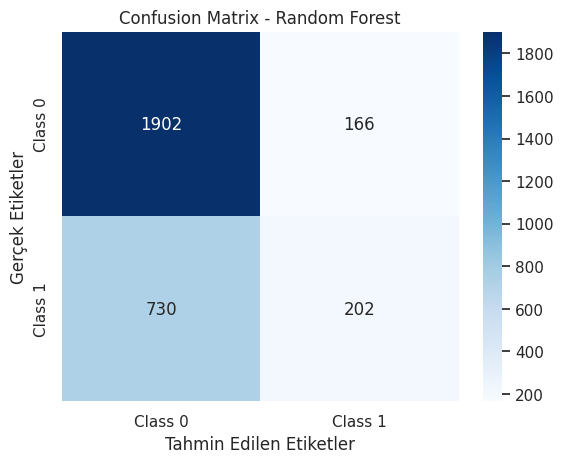

In [127]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Accuracy hesaplama
rf_accuracy = (rf_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
rf_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
rf_specificity = tn / (tn + fp)

# Precision hesaplama
rf_precision = tp / (tp + fp)

# F1 score hesaplama
rf_f1_score = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, rf_probs)
rf_roc_auc = metrics.auc(fpr, tpr)

print("Random Forest Results:")
print("Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Recall: {:.2f}".format(rf_recall))
print("Specificity: {:.2f}".format(rf_specificity))
print("Precision: {:.2f}".format(rf_precision))
print("F1 Score: {:.2f}".format(rf_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(rf_roc_auc))
print()



# Random Forest için karmaşıklık matrisini hesaplamak ve görselleştirmek
rf_y_pred = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
plot_confusion_matrix(rf_conf_matrix, classes=['Class 0', 'Class 1'], model_name='Random Forest')




XGBoost Results:
Accuracy: 68.53%
Recall: 0.30
Specificity: 0.86
Precision: 0.49
F1 Score: 0.37
Matthews Correlation Coefficient: 0.19
ROC AUC: 0.66



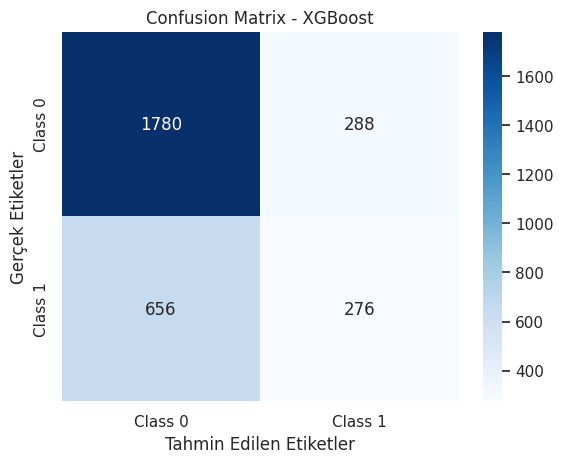

In [128]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Accuracy hesaplama
xgb_accuracy = (xgb_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, xgb_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
xgb_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
xgb_specificity = tn / (tn + fp)

# Precision hesaplama
xgb_precision = tp / (tp + fp)

# F1 score hesaplama
xgb_f1_score = 2 * (xgb_precision * xgb_recall) / (xgb_precision + xgb_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
xgb_probs = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, xgb_probs)
xgb_roc_auc = metrics.auc(fpr, tpr)

print("XGBoost Results:")
print("Accuracy: {:.2f}%".format(xgb_accuracy * 100))
print("Recall: {:.2f}".format(xgb_recall))
print("Specificity: {:.2f}".format(xgb_specificity))
print("Precision: {:.2f}".format(xgb_precision))
print("F1 Score: {:.2f}".format(xgb_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(xgb_roc_auc))
print()




# XGBoost için karmaşıklık matrisini hesaplamak ve görselleştirmek
xgb_y_pred = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
plot_confusion_matrix(xgb_conf_matrix, classes=['Class 0', 'Class 1'], model_name='XGBoost')



In [129]:
print(conf_matrix.shape)


(2, 2)


In [136]:
print(conf_matrix)


Predicted     0
Actual         
0          2068
1           932


Lineer SVM Results:
Accuracy: 68.93%
Recall: nan
Specificity: nan
Precision: nan
F1 Score: nan
Matthews Correlation Coefficient: nan
ROC AUC: 0.65



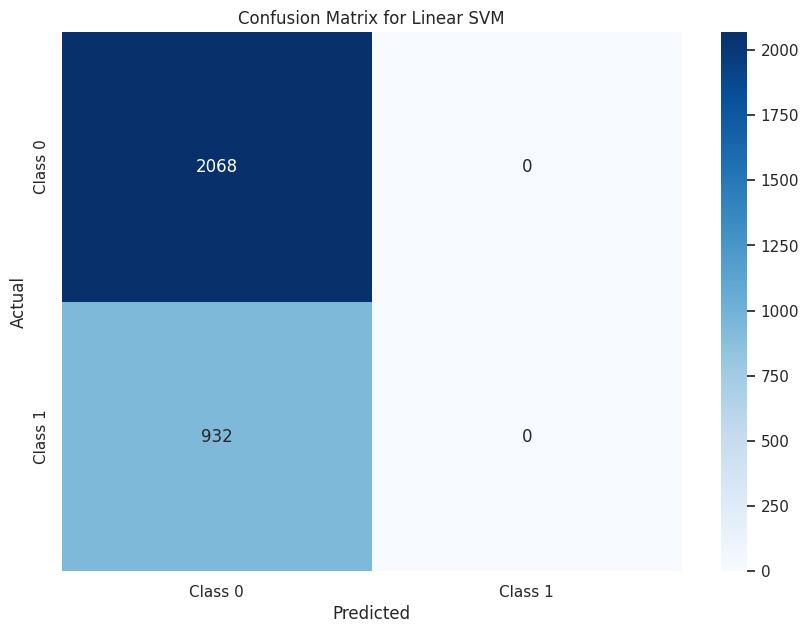

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc




# Lineer SVM modelini oluşturma
lsvm = SVC(kernel='linear', random_state=1)
lsvm.fit(X_train, y_train)
lsvm_pred = lsvm.predict(X_test)

# Accuracy hesaplama
lsvm_accuracy = (lsvm_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, lsvm_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall, Specificity, Precision, F1 score ve MCC hesaplama
if conf_matrix.shape[0] > 1 and conf_matrix.shape[1] > 1:
    tp = conf_matrix.iloc[1, 1]
    fn = conf_matrix.iloc[1, 0]
    tn = conf_matrix.iloc[0, 0]
    fp = conf_matrix.iloc[0, 1]

    lsvm_recall = tp / (tp + fn)
    lsvm_specificity = tn / (tn + fp)
    lsvm_precision = tp / (tp + fp)
    lsvm_f1_score = 2 * (lsvm_precision * lsvm_recall) / (lsvm_precision + lsvm_recall)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
else:
    lsvm_recall = np.nan
    lsvm_specificity = np.nan
    lsvm_precision = np.nan
    lsvm_f1_score = np.nan
    mcc = np.nan

# ROC AUC hesaplama
lsvm_probs = lsvm.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, lsvm_probs)
lsvm_roc_auc = auc(fpr, tpr)

print("Lineer SVM Results:")
print("Accuracy: {:.2f}%".format(lsvm_accuracy * 100))
print("Recall: {:.2f}".format(lsvm_recall))
print("Specificity: {:.2f}".format(lsvm_specificity))
print("Precision: {:.2f}".format(lsvm_precision))
print("F1 Score: {:.2f}".format(lsvm_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(lsvm_roc_auc))
print()

# Linear SVM için karmaşıklık matrisini hesaplamak ve görselleştirmek
lsvm_y_pred = lsvm.predict(X_test)
lsvm_conf_matrix = confusion_matrix(y_test, lsvm_y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix(lsvm_conf_matrix, classes=['Class 0', 'Class 1'], model_name='Linear SVM')


RBF SVM Results:
Accuracy: 69.33%
Recall: 0.08
Specificity: 0.97
Precision: 0.54
F1 Score: 0.15
Matthews Correlation Coefficient: 0.11
ROC AUC: 0.66



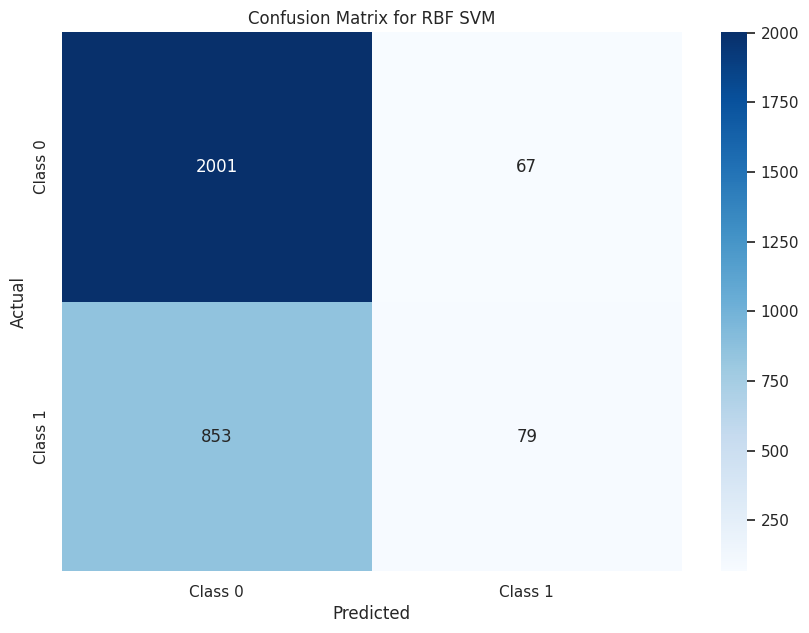

In [141]:
# RBF SVM
rbf_svm = SVC(kernel='rbf', random_state=1)
rbf_svm.fit(X_train, y_train)
rbf_svm_pred = rbf_svm.predict(X_test)

# Accuracy hesaplama
rbf_svm_accuracy = (rbf_svm_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, rbf_svm_pred, rownames=['Actual'], colnames=['Predicted'])


# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
rbf_svm_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
rbf_svm_specificity = tn / (tn + fp)

# Precision hesaplama
rbf_svm_precision = tp / (tp + fp)

# F1 score hesaplama
rbf_svm_f1_score = 2 * (rbf_svm_precision * rbf_svm_recall) / (rbf_svm_precision + rbf_svm_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
rbf_svm_probs = rbf_svm.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, rbf_svm_probs)
rbf_svm_roc_auc = metrics.auc(fpr, tpr)

print("RBF SVM Results:")
print("Accuracy: {:.2f}%".format(rbf_svm_accuracy * 100))
print("Recall: {:.2f}".format(rbf_svm_recall))
print("Specificity: {:.2f}".format(rbf_svm_specificity))
print("Precision: {:.2f}".format(rbf_svm_precision))
print("F1 Score: {:.2f}".format(rbf_svm_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(rbf_svm_roc_auc))
print()

# RBF SVM için karmaşıklık matrisini hesaplamak ve görselleştirmek
rbf_svm_y_pred = rbf_svm.predict(X_test)
rbf_svm_conf_matrix = confusion_matrix(y_test, rbf_svm_y_pred)
plot_confusion_matrix(rbf_svm_conf_matrix, classes=['Class 0', 'Class 1'], model_name='RBF SVM')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Results:
Accuracy: 68.83%
Recall: 0.36
Specificity: 0.84
Precision: 0.50
F1 Score: 0.42
Matthews Correlation Coefficient: 0.22
ROC AUC: 0.68



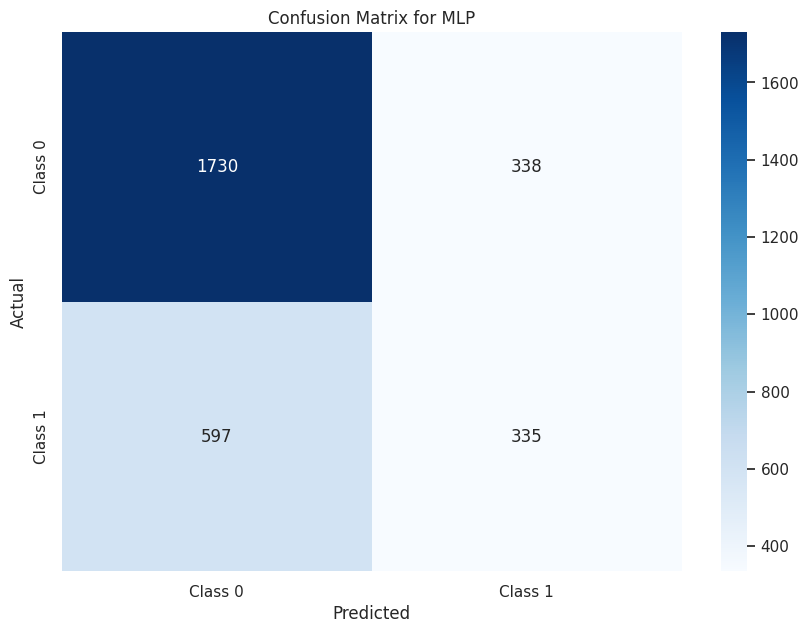

In [142]:
# MLP
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# Accuracy hesaplama
mlp_accuracy = (mlp_pred == y_test).mean()

# Confusion matrix hesaplama
conf_matrix = pd.crosstab(y_test, mlp_pred, rownames=['Actual'], colnames=['Predicted'])

# Recall hesaplama
tp = conf_matrix.iloc[1, 1]
fn = conf_matrix.iloc[1, 0]
mlp_recall = tp / (tp + fn)

# Specificity hesaplama
tn = conf_matrix.iloc[0, 0]
fp = conf_matrix.iloc[0, 1]
mlp_specificity = tn / (tn + fp)

# Precision hesaplama
mlp_precision = tp / (tp + fp)

# F1 score hesaplama
mlp_f1_score = 2 * (mlp_precision * mlp_recall) / (mlp_precision + mlp_recall)

# Matthews correlation coefficient hesaplama
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# ROC AUC hesaplama
mlp_probs = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, mlp_probs)
mlp_roc_auc = metrics.auc(fpr, tpr)

print("MLP Results:")
print("Accuracy: {:.2f}%".format(mlp_accuracy * 100))
print("Recall: {:.2f}".format(mlp_recall))
print("Specificity: {:.2f}".format(mlp_specificity))
print("Precision: {:.2f}".format(mlp_precision))
print("F1 Score: {:.2f}".format(mlp_f1_score))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))
print("ROC AUC: {:.2f}".format(mlp_roc_auc))
print()


# MLP için karmaşıklık matrisini hesaplamak ve görselleştirmek
mlp_y_pred = mlp.predict(X_test)
mlp_conf_matrix = confusion_matrix(y_test, mlp_y_pred)
plot_confusion_matrix(mlp_conf_matrix, classes=['Class 0', 'Class 1'], model_name='MLP')



Buradan sonrasında, birden fazla makine öğrenmesi modelinin performansını değerlendirerek, her bir model için çeşitli metrikler (doğruluk, recall, F1 skoru, precision, specificity, MCC ve ROC AUC) hesaplar ve bu metrikleri bir veri çerçevesinde saklanır. Böylece, modellerin karşılaştırmalı performansı tek bir tablo üzerinden kolayca analiz edilebilir.

In [146]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Metrik değerlerini saklamak için bir veri çerçevesi oluşturma
metrics_df = pd.DataFrame(columns=['Accuracy', 'Recall', 'F1 Score', 'Precision', 'Specificity', 'Matthews Corr. Coef.', 'ROC AUC'])

# Modellerin isimlerini ve tahminlerini saklayan bir sözlük oluşturma
models = {'Logistic Regression': lr_pred,
          'K-Nearest Neighbors': knn_pred,
          'Support Vector Machine (SVM)': svm_pred,
          'Naive Bayes': nb_pred,
          'Decision Tree': dtc_pred,
          'Random Forest': rf_pred,
          'XGBoost': xgb_pred,
          'Linear SVM': lsvm_pred,
          'RBF SVM': rbf_svm_pred,
          'MLP': mlp_pred}

# Her model için metrik hesaplama
for model_name, pred in models.items():
    # Accuracy hesaplama
    accuracy = (pred == y_test).mean()

    # Confusion matrix hesaplama
    conf_matrix = confusion_matrix(y_test, pred)

    # Recall, Specificity, Precision, F1 score ve MCC hesaplama
    if conf_matrix.shape[0] > 1 and conf_matrix.shape[1] > 1:
        tp = conf_matrix[1, 1]
        fn = conf_matrix[1, 0]
        tn = conf_matrix[0, 0]
        fp = conf_matrix[0, 1]

        recall = tp / (tp + fn)
        specificity = tn / (tn + fp)
        precision = tp / (tp + fp)
        f1_score = 2 * (precision * recall) / (precision + recall)
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    else:
        recall = np.nan
        specificity = np.nan
        precision = np.nan
        f1_score = np.nan
        mcc = np.nan

    # ROC AUC hesaplama
    probs = None
    if model_name == 'Support Vector Machine (SVM)':
        probs = svm_probs
    elif model_name == 'Naive Bayes':
        probs = nb_probs
    elif model_name == 'Decision Tree':
        probs = dtc_probs
    elif model_name == 'Random Forest':
        probs = rf_probs
    elif model_name == 'XGBoost':
        probs = xgb_probs
    elif model_name == 'Linear SVM':
        probs = lsvm_probs
    elif model_name == 'RBF SVM':
        probs = rbf_svm_probs
    elif model_name == 'MLP':
        probs = mlp_probs

    if probs is not None:
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = np.nan

    # Metrikleri veri çerçevesine ekleme
    metrics_df.loc[model_name] = [accuracy, recall, f1_score, precision, specificity, mcc, roc_auc]

# Tabloyu görüntüleme
print(metrics_df)


                              Accuracy    Recall  F1 Score  Precision  \
Logistic Regression           0.707000  0.228541  0.326437   0.571046   
K-Nearest Neighbors           0.669333  0.150215  0.220126   0.411765   
Support Vector Machine (SVM)  0.693333  0.084764  0.146568   0.541096   
Naive Bayes                   0.659000  0.584764  0.515854   0.461473   
Decision Tree                 0.602667  0.392704  0.380457   0.368952   
Random Forest                 0.701333  0.216738  0.310769   0.548913   
XGBoost                       0.685333  0.296137  0.368984   0.489362   
Linear SVM                    0.689333  0.000000       NaN        NaN   
RBF SVM                       0.693333  0.084764  0.146568   0.541096   
MLP                           0.688333  0.359442  0.417445   0.497771   

                              Specificity  Matthews Corr. Coef.   ROC AUC  
Logistic Regression              0.922631              0.212016       NaN  
K-Nearest Neighbors              0.903288   

<ipython-input-146-f6781508cd1d>:37: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
<ipython-input-146-f6781508cd1d>:39: RuntimeWarning: invalid value encountered in scalar divide
  mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Sınıflandırıcıları bir liste olarak saklayalım
classifiers = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

# Metrikler için boş bir veri çerçevesi oluşturalım
metrics_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC', 'Specificity'])

# Her bir sınıflandırıcı için test protokolünü oluşturalım
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Sonuçları veri çerçevesine ekleyelim
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Classifier': [clf_name],
                                                      'Accuracy': [accuracy],
                                                      'Recall': [recall],
                                                      'Precision': [precision],
                                                      'F1 Score': [f1],
                                                      'ROC AUC': [roc_auc],
                                                      'Specificity': [specificity]})],
                                                      ignore_index=True)

# Sonuçları yazdıralım
print(metrics_df)


               Classifier  Accuracy    Recall  Precision  F1 Score   ROC AUC  \
0      LogisticRegression  0.707000  0.228541   0.571046  0.326437  0.575586   
1    KNeighborsClassifier  0.656000  0.298283   0.423780  0.350126  0.557749   
2                     SVC  0.693333  0.084764   0.541096  0.146568  0.526183   
3              GaussianNB  0.659000  0.584764   0.461473  0.515854  0.638610   
4  DecisionTreeClassifier  0.590667  0.366953   0.348980  0.357741  0.529221   
5  RandomForestClassifier  0.699000  0.222103   0.537662  0.314351  0.568015   
6           XGBClassifier  0.685333  0.296137   0.489362  0.368984  0.578436   

   Specificity  
0     0.922631  
1     0.817215  
2     0.967602  
3     0.692456  
4     0.691489  
5     0.913926  
6     0.860735  


In [148]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Sınıflandırıcıları tanımlama
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear SVM': SVC(kernel='linear'),
    'RBF SVM': SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'Support Vector Machine': SVC()
}

# Metrikleri depolamak için bir liste oluşturma
data = []

# Her sınıflandırıcı için test protokolü ve 10 kat çapraz doğrulama uygulama
for clf_name, clf in classifiers.items():
    # 10 kat çapraz doğrulama ile doğruluk hesaplama
    accuracy_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    accuracy = accuracy_scores.mean()

    # Geri çağırma, hassasiyet, F1 puanı ve ROC AUC hesaplama
    recall_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall')
    recall = recall_scores.mean()

    precision_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    precision = precision_scores.mean()

    f1_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
    f1 = f1_scores.mean()

    roc_auc_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    roc_auc = roc_auc_scores.mean()

    # Her bir sınıflandırıcının metriklerini listeye ekleme
    data.append({'Classifier': clf_name,
                 'Accuracy': accuracy,
                 'Recall': recall,
                 'Precision': precision,
                 'F1 Score': f1,
                 'ROC AUC': roc_auc})

# Liste kullanarak bir DataFrame oluşturma
metrics_df = pd.DataFrame(data)
print(metrics_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

               Classifier  Accuracy    Recall  Precision  F1 Score   ROC AUC
0     Logistic Regression  0.705750  0.212221   0.560192  0.307291  0.697744
1     K-Nearest Neighbors  0.658583  0.294124   0.423623  0.346979  0.607626
2              Linear SVM  0.691750  0.000000   0.000000  0.000000  0.569673
3                 RBF SVM  0.698667  0.080023   0.580326  0.140289  0.644912
4             Naive Bayes  0.655583  0.580699   0.454387  0.509569  0.683148
5           Decision Tree  0.619833  0.404690   0.388652  0.390374  0.559566
6           Random Forest  0.704333  0.217083   0.544956  0.319496  0.686974
7                     MLP  0.688917  0.300871   0.505158  0.353534  0.672702
8                 XGBoost  0.687667  0.300902   0.490053  0.372408  0.659814
9  Support Vector Machine  0.698667  0.080023   0.580326  0.140289  0.644912


In [151]:
# En yüksek doğruluğa sahip sınıflandırıcıyı bulma
best_accuracy_classifier = metrics_df.loc[metrics_df['Accuracy'].idxmax()]

print("En yüksek doğruluk performansı gösteren algoritma:")
print(best_accuracy_classifier)


En yüksek doğruluk performansı gösteren algoritma:
Classifier    Logistic Regression
Accuracy                  0.70575
Recall                   0.212221
Precision                0.560192
F1 Score                 0.307291
ROC AUC                  0.697744
Name: 0, dtype: object
